# Task 1: NYC Weather & CitiBike Trends (The line charts)

# NYC CitiBike & Weather Analysis (2022)
This notebook explores the relationship between weather patterns and bike-sharing usage in New York City.

Learning Goals:

Differentiate between procedural and object-oriented programming in Matplotlib.

Analyze correlations between temperature and trip volume.

Visualize data distributions and categorical proportions using histograms, bar charts, and pie charts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load only the columns needed for this task to save memory/speed
# We need 'date', 'avgTemp', and 'ride_id' (to count the trips)
df = pd.read_csv('merged_citibike_2022.csv', usecols=['date', 'avgTemp', 'ride_id'])

# Ensure date is in the correct format
df['date'] = pd.to_datetime(df['date'])

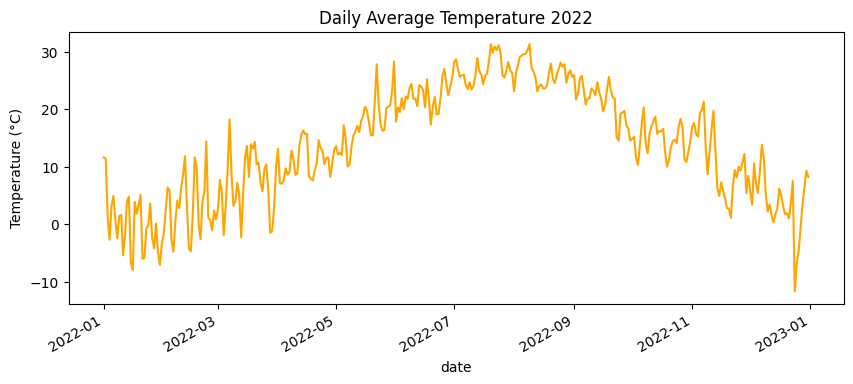

In [2]:
# Create a daily weather summary
df_temp_daily = df[['date', 'avgTemp']].drop_duplicates().set_index('date').sort_index()

# Step 3 Exercise: Simple Pandas plot
df_temp_daily['avgTemp'].plot(figsize=(10, 4), title='Daily Average Temperature 2022', color='orange')
plt.ylabel('Temperature (°C)')
plt.show()

In [3]:
# 1. Create count of trips per day
df_counts = df.groupby('date').size().reset_index(name='trip_count')

# 2. Extract unique daily weather
df_weather = df[['date', 'avgTemp']].drop_duplicates()

# 3. Merge them together
df_daily = df_counts.merge(df_weather, on='date').sort_values('date')

# Preview the small, fast dataframe
print(df_daily.head())

        date  trip_count  avgTemp
0 2021-01-30           1      NaN
1 2021-02-15           1      NaN
2 2021-03-11           1      NaN
3 2021-03-14           1      NaN
4 2021-03-31           1      NaN


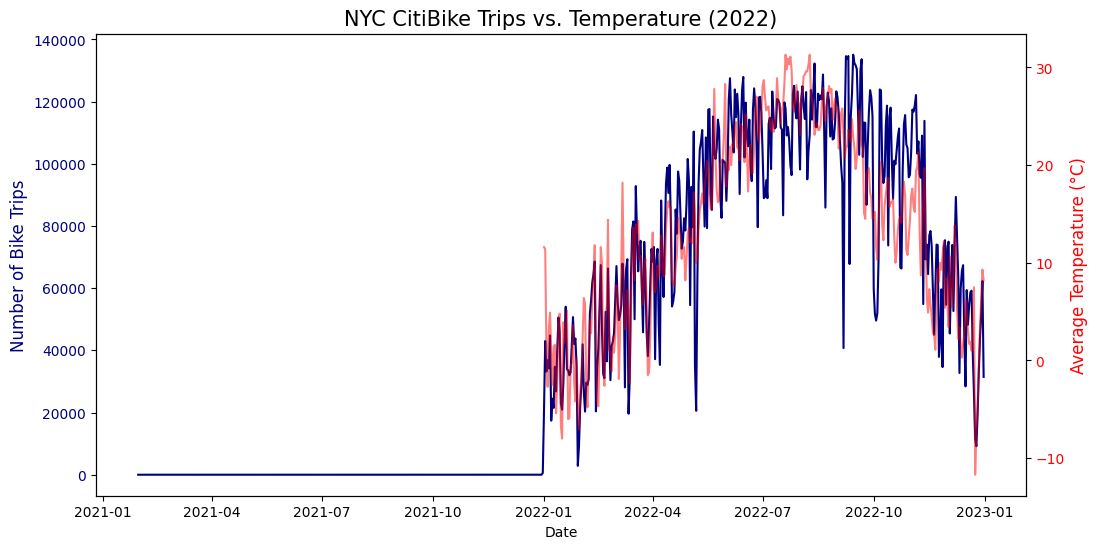

In [4]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set up the first axis (Bike Trips)
ax1.plot(df_daily['date'], df_daily['trip_count'], color='navy', label='Daily Trips')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Bike Trips', color='navy', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')

# Create the dual axis for temperature
ax2 = ax1.twinx()
ax2.plot(df_daily['date'], df_daily['avgTemp'], color='red', alpha=0.5, label='Avg Temp')
ax2.set_ylabel('Average Temperature (°C)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add Title
plt.title('NYC CitiBike Trips vs. Temperature (2022)', fontsize=15)
plt.show()

### Data Interpretation: Temperature vs. Usage
The dual-axis chart reveals a strong positive correlation between average daily temperature and the number of CitiBike trips. Usage peaks during the summer months (June–August) and significantly declines during the winter, confirming that weather is a primary driver of ridership volume in NYC.

For the final visualization, I used the Object-Oriented (OO) approach of Matplotlib. This was achieved by using fig, ax = plt.subplots(), which explicitly creates Figure and Axes objects.

By using ax1.twinx(), I created a dual-axis chart that allows two variables with different scales (thousands of rides vs. double-digit temperatures) to be overlaid on the same X-axis (time). This paradigm is more powerful than the procedural approach because it allows for granular customization of each axis independently, which is necessary for clear professional visualizations.

# Bonus Task: Statistical Distribution & Equipment Analysis (The Histogram, Bar, and Pie charts)

# Bonus Task: Deep Dive into Trip Characteristics
For this section, we analyze trip durations and user demographics.

Note: Since the 2022 dataset does not contain 'Gender' or 'Usertype' in the legacy format, we use 'member_casual' as the user variable and 'rideable_type' (Electric vs. Classic) as our categorical equipment variable.

In [9]:
# Load only the columns needed for bonus tasks
df_bonus = pd.read_csv('merged_citibike_2022.csv', 
                       usecols=['started_at', 'ended_at', 'member_casual', 'rideable_type'])

# Calculate trip duration in minutes
df_bonus['started_at'] = pd.to_datetime(df_bonus['started_at'])
df_bonus['ended_at'] = pd.to_datetime(df_bonus['ended_at'])
df_bonus['trip_duration'] = (df_bonus['ended_at'] - df_bonus['started_at']).dt.total_seconds() / 60

# Filter for realistic trips (between 1 and 60 minutes) to avoid outliers ruining the histogram
df_filtered = df_bonus[(df_bonus['trip_duration'] > 1) & (df_bonus['trip_duration'] < 60)]

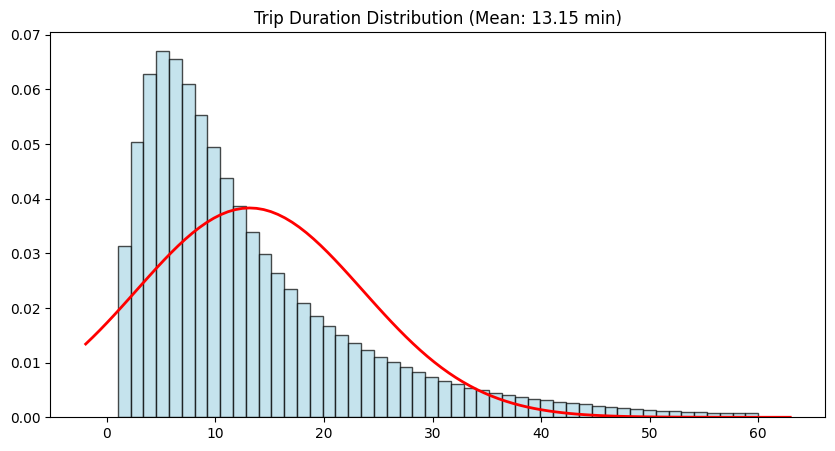

In [10]:
from scipy.stats import norm
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5))

# Plot histogram - density=True is key to matching the curve scale
# 
n, bins, patches = ax.hist(df_filtered['trip_duration'], bins=50, color='lightblue', density=True, edgecolor='black', alpha=0.7)

# Calculate the curve
mu, std = norm.fit(df_filtered['trip_duration'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the curve
ax.plot(x, p, 'r', linewidth=2)
ax.set_title(f"Trip Duration Distribution (Mean: {mu:.2f} min)")
plt.show()

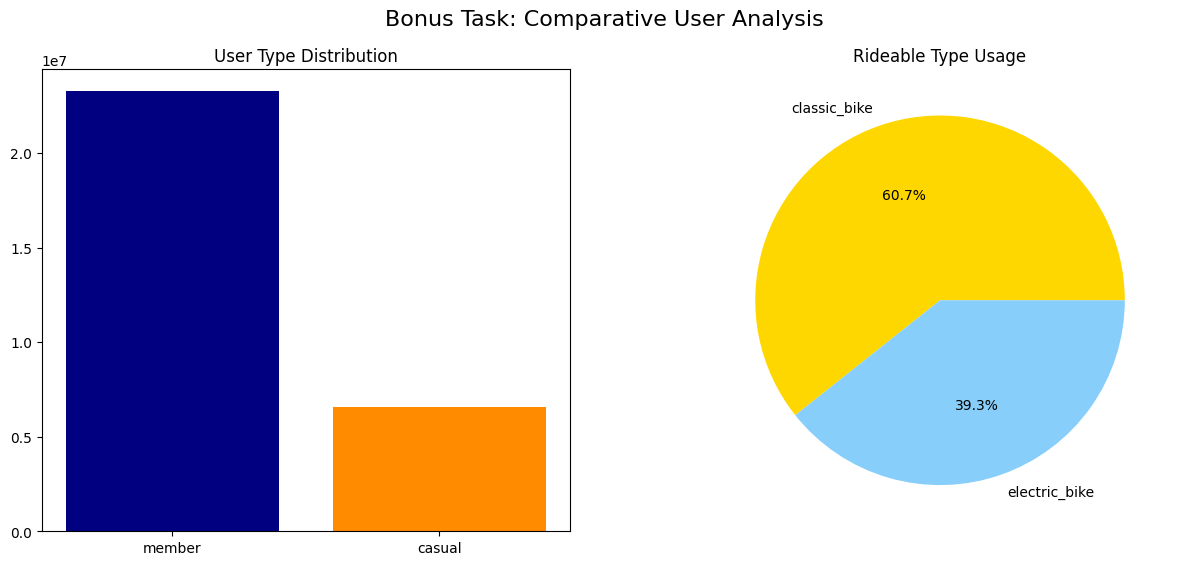

In [11]:
# Create the figure with two side-by-side axes
# 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart (User Type)
user_counts = df_bonus['member_casual'].value_counts()
ax1.bar(user_counts.index, user_counts.values, color=['navy', 'darkorange'])
ax1.set_title('User Type Distribution')

# Pie Chart (Bike Type)
bike_counts = df_bonus['rideable_type'].value_counts()
ax2.pie(bike_counts, labels=bike_counts.index, autopct='%1.1f%%', colors=['gold', 'lightskyblue', 'lightgreen'])
ax2.set_title('Rideable Type Usage')

plt.suptitle('Bonus Task: Comparative User Analysis', fontsize=16)
plt.show()

### Conclusions from Bonus Analysis

Trip Duration: The histogram (with the normal distribution curve) shows that most trips are short, centered around 10–15 minutes, which is typical for urban "last-mile" transit.

User Split: The side-by-side comparison shows a healthy mix of casual riders and annual members, while the equipment pie chart highlights the growing popularity of electric bikes within the fleet.